In [1]:
import numpy as np
from astropy import units as u
from plasmapy.classes import Plasma, Species
%matplotlib inline

Initialize a plasma. This will be a source of electric and magnetic fields for our particles to move in.

In [2]:
plasma = Plasma(domain_x=np.linspace(-1, 1, 10)*u.m,
                domain_y=np.linspace(-1, 1, 10)*u.m,
                domain_z=np.linspace(-1, 1, 10)*u.m)

Initialize the fields. We'll take $\vec{B}$ in the $\hat{x}$ direction and $E$ in the $\hat{y}$ direction, which gets us an $E \times B$ drift in $\hat{z}$.

In [3]:
B0 = 4 * u.T
plasma.magnetic_field[0,:,:,:] = np.ones((10,10,10)) * B0

E0 = 2 * u.V/u.m
plasma.electric_field[1,:,:,:] = np.ones((10,10,10)) * E0 

Initialize the particle. We'll take one proton `p` with a timestep of $10^{-10}s$ and run it for 10000 iterations.

In [4]:
species = Species(plasma,'p',1,1,1e-10*u.s,10000)

Initialize the particle's velocity. We'll limit ourselves to one in the $\hat{x}$ direction, parallel to the magnetic field $\vec{B}$ - that way, it won't turn in the $\hat{z}$ direction.

In [5]:
V0 = 1 * (u.m / u.s)
species.v[0][0] = V0

Run the pusher and plot the trajectory versus time.

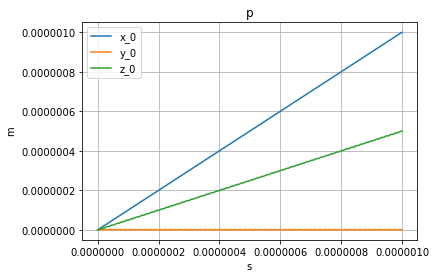

In [6]:
species.run()
species.plot_time_trajectories()

Plot the shape of the trajectory in 3D.

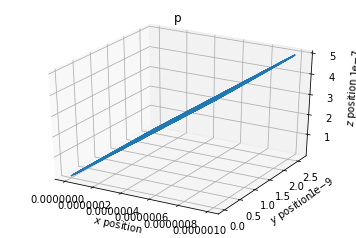

In [7]:
species.plot_trajectories()

As a test, we calculate the mean velocity in the z direction from the velocity and position

In [8]:
vmean = species.velocity_history[:,:,2].mean()
print(f"The calculated drift velocity is {vmean:.4f} to compare with the theoretic E0/B0 = {E0/B0:.4f}")

# and from position:
Vdrift = species.position_history[-1,0,2]/(species.NT*species.dt)
normdrift = Vdrift
print(f"The calculated drift velocity from position is {normdrift:.4f}")

The calculated drift velocity is 0.5002 m / s to compare with the theoretic E0/B0 = 0.5000 V / (m T)
The calculated drift velocity from position is 0.5002 m / s
